# ML Local - Continuous Regression Methods - Udacity - UD120


## Udacity to Machine Learning

[udacity course](https://classroom.udacity.com/courses/ud120)

# Continuous Regression
Continous... estimate how many kph, not fast vs slow  
Continous... _output_

In the case of a single "feature" or "input"... this is simply the best fit line, from datapoints.  
Often minimizing R^2 is an objective.

### Reasons to Use
- xx
- xx

### Reasons to Avoid
- xx
- xx

### Terminology

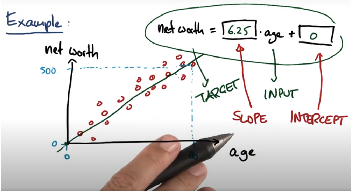

| Term | Definition |
| :- | :- |
| Target | Output of regression we're solving for, "target" in svm. In example, net worth |
| Input | Input to system, the "feature_name" in svm. In example, age | Slope | Dirrivative of output wrt input |
| Intercept | Initial value of "target", in absense (0) of input |

### Resources
[Scikit generalized linear models](https://scikit-learn.org/0.15/modules/linear_model.html)

In [7]:
import numpy as np
X_inputTwoFeatures = np.ndarray(shape=(3,2))

# define input (X) and target (Y)
X_inputTwoFeatures[0,:] = (  0, 0)
X_inputTwoFeatures[1,:] = (0.9, 1.1)
X_inputTwoFeatures[2,:] = (1.9, 2.1)

Y_output = np.ndarray(shape=(3,1))
Y_output[0,0] = 0
Y_output[1,0] = 1
Y_output[2,0] = 2

# From https://scikit-learn.org/0.15/modules/linear_model.html
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X_inputTwoFeatures, Y_output)
clf.coef_

array([[0.5, 0.5]])

### Example using random noise ontop of line
#### Create dataset, using 2 features, 200 datapoints

In [19]:
from random import random
cancer = datasets.load_breast_cancer() # container object w data, feature_names, target [labels]
r_randomVector = np.ndarray(shape=(200,2))
with np.nditer(r_randomVector, op_flags=['readwrite']) as it:
    for x in it:
        x[...] = random()*10
r_lineVector = np.ndarray(shape=(200,2))
slope1 = 0.25
offset1 = 7.0
slope2 = -0.33
offset2 = 12.0
for i in range(200):
    r_lineVector[i,0] = i*slope1 + offset1
    r_lineVector[i,1] = i*slope2 + offset2
        

X_features = r_lineVector + r_randomVector
y_labels = r_lineVector

# from sklearn import datasets

#x_featureNames = cancer.feature_names[3:5]

#x_features_meanArea = cancer.data[:,3] # 569,30 ndarray; taking 569,1 size vector correspondig to mean area
#x_features_meanSmoothness = cancer.data[:,4] # ^samesame, corresponding to smoothness of tumor

#X_features = np.ndarray( shape=(569,2) ) # note: SVM method needs at least 2 features!!

#X_features[:,0] = x_features_meanArea
#X_features[:,1] = x_features_meanSmoothness

#y_labels_malignantBenign = cancer.target # 569,1 ndarray; values: 0|malignant, 1|benign


#### Create split in training and test datasets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3, random_state=109)


#### Calculate accuracy using test data, using rms objective 

Residual sum of squares: 3.40


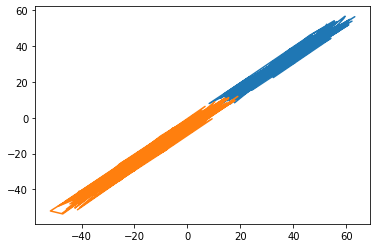

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
predFull = clf.predict(X_test)
rms = np.mean((predFull - y_test)**2)
print("Residual sum of squares: %.2f" % rms)
plt.plot(X_train[:,], y_train)
plt.show()

Originally, I had this example going off of the breast cancer data. That data is classification data by nature, not continous.
I saw the residual sum of squares, was 0.04 in that case & I concluded it wasn't working well.
I then switched to the random noise + line you see here.
However, my interpretation of the sum of squares was incorrect. This is the residual sum of squares. A small number is desireable.